In [1]:
import os
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from fytok.Tokamak import Tokamak
from fytok.utils.load_scenario import load_scenario
from fytok.utils.plot_profiles import plot_profiles, sp_figure
from scipy import constants
from spdm.data.Expression import Variable
from spdm.data.File import File
from spdm.utils.logger import logger

2023-06-14 14:30:49,548 INFO [spdm] : Set mapping path: /home/salmon/workspace/fytok/python/fytok/_mapping


In [2]:
scenario = load_scenario("/home/salmon/workspace/data/15MA inductive - burn")

2023-06-14 14:30:50,966 INFO [spdm] : Load scenario/equilibrium from /home/salmon/workspace/data/15MA inductive - burn/Increased domain R-Z/Medium resolution - 129x257/g900003.00230_ITER_15MA_eqdsk16VVMR.txt
2023-06-14 14:30:50,969 INFO [spdm] : Load module spdm.plugins.data.PluginGEQdsk from /home/salmon/workspace/SpDB/python/spdm/plugins/data/PluginGEQdsk.py
2023-06-14 14:30:50,970 DEBUG [spdm] /home/salmon/workspace/SpDB/python/spdm/plugins/data/PluginGEQdsk.py:329:__init__: Open File URITuple(protocol='local', authority='', path=PosixPath('/home/salmon/workspace/data/15MA inductive - burn/Increased domain R-Z/Medium resolution - 129x257/g900003.00230_ITER_15MA_eqdsk16VVMR.txt'), query=None, fragment='', format='', schema='') mode=Mode.read
2023-06-14 14:30:50,997 INFO [spdm] : Load scenario/profiles from /home/salmon/workspace/data/15MA inductive - burn/15MA Inductive at burn-ASTRA.xls


In [3]:
tok = Tokamak("ITER",
              name=scenario["name"],
              description=scenario["description"],
              core_profiles={**scenario["core_profiles"],
                             #  "$default_value": {
                             #      "profiles_1d": {"grid": {
                             #          "rho_tor_norm": np.linspace(0, 1.0, 100),
                             #          "psi": np.linspace(0, 1.0, 100),
                             #          "psi_magnetic_axis": 0.0,
                             #          "psi_boundary": 1.0,
                             #      }}}
                             },
              equilibrium={**scenario["equilibrium"],
                           "code": {"name":  "freegs", "parameters": {"boundary": "fixed"}},
                           "$default_value": {"time_slice": {
                               "boundary": {"psi_norm": 0.99},
                               "coordinate_system": {"grid": {"dim1": 256, "dim2": 128}}
                           }}}
              )




2023-06-14 14:30:51,780 INFO [spdm] : Load module spdm.plugins.data.PluginXML from /home/salmon/workspace/SpDB/python/spdm/plugins/data/PluginXML.py


2023-06-14 14:30:53,086 INFO [spdm] : Load module fytok.plugins.equilibrium.freegs from /home/salmon/workspace/fymodule-restricted/python/fytok/plugins/equilibrium/freegs.py
2023-06-14 14:30:53,105 DEBUG [spdm] /home/salmon/workspace/fytok/python/fytok/modules/Equilibrium.py:33:update: Update Equlibrium at time=0.0
2023-06-14 14:30:53,107 INFO [spdm] : Update Equilibrium: EquilibriumFreeGS
2023-06-14 14:30:53,165 DEBUG [spdm] /home/salmon/workspace/fymodule-restricted/python/fytok/plugins/equilibrium/freegs.py:78:_update_machine: Setup machine description: wall={'name': 'ITER', 'index': 1, 'description': 'for equilibrium codes (single closed limiter and vessel);'}
2023-06-14 14:30:53,169 INFO [spdm] : Load module spdm.mesh.RectangularMesh from /home/salmon/workspace/SpDB/python/spdm/mesh/RectangularMesh.py
2023-06-14 14:30:53,171 DEBUG [spdm] /home/salmon/workspace/fymodule-restricted/python/fytok/plugins/equilibrium/freegs.py:110:update: Using fixed boundary
2023-06-14 14:30:56,207 DE

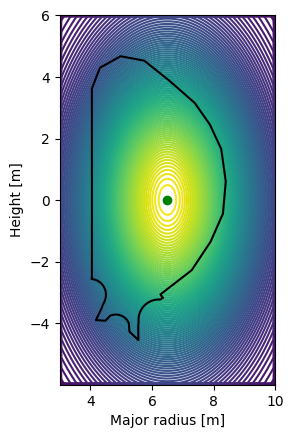

/home/salmon/.local/lib/python3.10/site-packages/freegs/picard.py:163: RuntimeWarning: invalid value encountered in scalar divide
  bndry_relchange = abs(bndry_change / bndry)


psi_relchange: 0.4120416071010203
bndry_relchange: nan
bndry_change: 0.0


psi_relchange: 0.17797544966707074
bndry_relchange: nan
bndry_change: 0.0


psi_relchange: 0.07541751643334343
bndry_relchange: nan
bndry_change: 0.0


psi_relchange: 0.03836098275217227
bndry_relchange: nan
bndry_change: 0.0


psi_relchange: 0.02031029074547923
bndry_relchange: nan
bndry_change: 0.0


psi_relchange: 0.010926196303081032
bndry_relchange: nan
bndry_change: 0.0


psi_relchange: 0.005867655561575749
bndry_relchange: nan
bndry_change: 0.0


2023-06-14 14:31:03,346 INFO [spdm] : Solve G-S equation Done
2023-06-14 14:31:03,348 DEBUG [spdm] /home/salmon/workspace/fytok/python/fytok/modules/Equilibrium.py:33:update: Update Equlibrium at time=0.0
2023-06-14 14:31:03,349 INFO [spdm] : Update Equilibrium: EquilibriumFreeGS Done


In [4]:
tok.equilibrium.update(
        wall=tok.wall,
        pf_active=tok.pf_active,
        Ip=1.5e6, beta_p=0.6056,
        tolerance=1.0e-2,)

2023-06-14 14:31:06,527 DEBUG [spdm] /home/salmon/workspace/fytok/python/fytok/plugins/equilibrium/eq_analyze.py:109:__init__: Create MagneticCoordSystem.
2023-06-14 14:31:06,529 DEBUG [spdm] /home/salmon/workspace/fytok/python/fytok/plugins/equilibrium/eq_analyze.py:125:__init__: COCOS=5


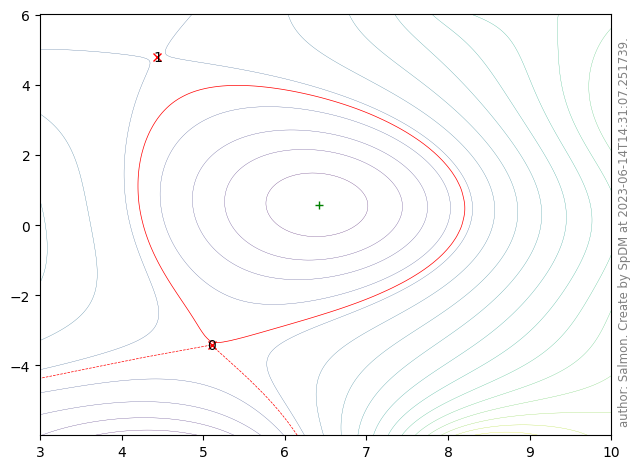

In [5]:
fig=sp_figure(tok.equilibrium)

In [21]:
tok.equilibrium.time_slice[0].coordinate_system

In [7]:
d=np.linspace(0,1.0,10)

In [8]:
d.append(1.0)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

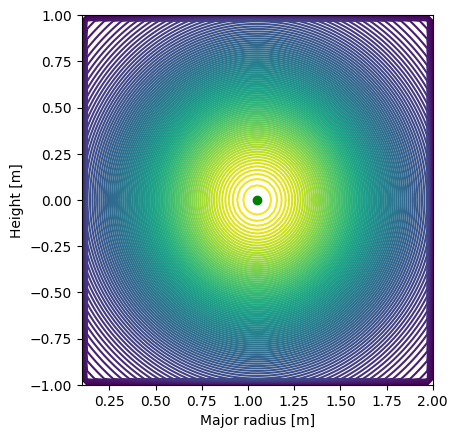

/home/salmon/.local/lib/python3.10/site-packages/freegs/picard.py:163: RuntimeWarning: invalid value encountered in scalar divide
  bndry_relchange = abs(bndry_change / bndry)


psi_relchange: 64.57285462284993
bndry_relchange: nan
bndry_change: 0.0


psi_relchange: 0.5230384212460922
bndry_relchange: nan
bndry_change: 0.0


psi_relchange: 0.0662538730651947
bndry_relchange: nan
bndry_change: 0.0


psi_relchange: 0.03888400161838232
bndry_relchange: nan
bndry_change: 0.0


psi_relchange: 0.017808997965222798
bndry_relchange: nan
bndry_change: 0.0


psi_relchange: 0.008096421456997951
bndry_relchange: nan
bndry_change: 0.0


psi_relchange: 0.003688659620126228
bndry_relchange: nan
bndry_change: 0.0


psi_relchange: 0.0016487564860529571
bndry_relchange: nan
bndry_change: 0.0


psi_relchange: 0.000736959805700828
bndry_relchange: nan
bndry_change: 0.0


Done!


/home/salmon/.local/lib/python3.10/site-packages/freegs/jtor.py:67: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  val, _ = quad(self.pprime, pvals[i], 1.0)


Poloidal beta: 0.5260497660497221
Pressure on axis: 1000.0 Pa


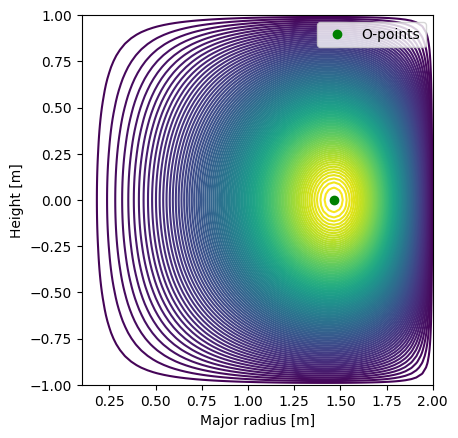

<Axes: xlabel='Major radius [m]', ylabel='Height [m]'>

In [14]:
import freegs

# Boundary conditions
import freegs.boundary as boundary

eq = freegs.Equilibrium(Rmin=0.1, Rmax=2.0,
                        Zmin=-1.0, Zmax=1.0,
                        nx=65, ny=65,
                        boundary=boundary.fixedBoundary)

profiles = freegs.jtor.ConstrainPaxisIp(eq,
                                        1e3, # Plasma pressure on axis [Pascals]
                                        1e5, # Plasma current [Amps]
                                        1.0) # fvac = R*Bt

# Nonlinear solver for Grad-Shafranov equation
freegs.solve(eq,           # The equilibrium to adjust
            profiles,	   # The toroidal current profile function
            show = True)

print("Done!")

# Some diagnostics
print("Poloidal beta: {}".format(eq.poloidalBeta()))
print("Pressure on axis: {} Pa".format(eq.pressure(0.0)))

# Plot equilibrium
from freegs.plotting import plotEquilibrium
plotEquilibrium(eq)

In [15]:
psirz=eq.psi()

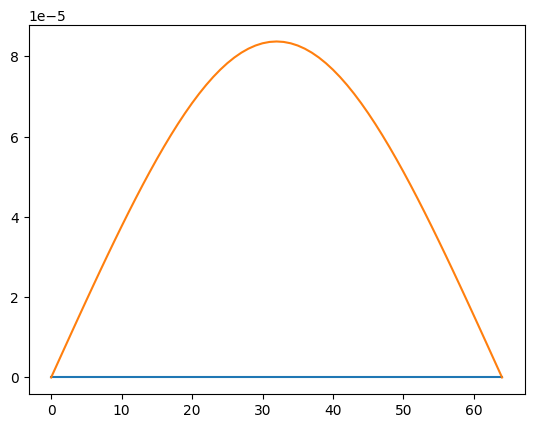

In [18]:
plt.plot(psirz[0,:])
plt.plot(psirz[1,:])